In [47]:
import pandas as pd
import numpy as np

In [48]:
FILE_PATH = '../../data/marketing/attribution_data.csv'
df = pd.read_csv(FILE_PATH)
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


* Cookie: 브라우저를 이용해 사이트에 방문한 사용자들에게 부여된 랜덤한 쿠키의 ID
* Timestamp: 사이트에 방문한 시간(쿠키 기록 시간)
* Interaction: 사이트에 방문한 사용자에게 광고가 노출 되었는지, 전환 까지 이루어 졌는지에 대한 카테고리 변수
* Conversion: 0 : 실제 구매가 이루어지지 않음. 1 : 실제 구매가 이루어 졌음
* Conversion Value: 전환의 가치
* Channel: 마케팅에 대한 온라인 채널


In [49]:
df_channels_per_cookie = df.groupby('cookie')['channel'].nunique().reset_index()
df_channels_per_cookie.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [50]:
# 채널 수 별 유저 수 확인
df_channels_per_cookie.groupby('channel').count()

,cookie
channel,
1,183020
2,45964
3,9549
4,1473
5,102


## Last Interaction Attribution Model
* 마지막으로 노출/클릭된 채널의 기여도를 100%로 계산

In [51]:
TEST_USER = '00000FkCnDfDDf0iC97iC703B'
df.loc[df['cookie'] == TEST_USER]

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display


In [52]:
# 마지막으로 본 광고 선택
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'channel', 'conversion']]
df_last_interaction.head(10)

,cookie,channel,conversion
3,00000FkCnDfDDf0iC97iC703B,Online Display,0
9,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
14,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
20,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
28,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [53]:
# conversion 된 경우만 확인
df_last_interaction_conv = df_last_interaction.loc[df_last_interaction['conversion'] == 1]
df_last_interaction_conv.head()

,cookie,channel,conversion
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
83,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
109,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
124,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [54]:
last_interaction_attrib = df_last_interaction_conv.groupby('channel')['cookie'].count().reset_index()
# last interaction 만 남겼기 때문에 어차피 중복 없음 => nunique 대신 count 이용
last_interaction_attrib = last_interaction_attrib.rename(
    columns={
        'cookie':'attribution'
    }
)
last_interaction_attrib

,channel,attribution
0,Facebook,5301
1,Instagram,2244
2,Online Display,2139
3,Online Video,3408
4,Paid Search,4547


## First Interaction Attribution Model
* 고객이 상호작용한(노출된) 첫 번째 채널이 전환에 100% 기여했다고 간주

In [55]:
df_first_interaction = df.drop_duplicates('cookie', keep='first')[['cookie', 'channel', 'conversion']]
df_first_interaction.head(10)

,cookie,channel,conversion
0,00000FkCnDfDDf0iC97iC703B,Instagram,0
4,0000nACkD9nFkBBDECD3ki00E,Paid Search,0
10,0003EfE37E93D0BC03iBhBBhF,Paid Search,0
15,00073CFE3FoFCn70fBhB3kfon,Instagram,0
16,00079hhBkDF3k3kDkiFi9EFAD,Paid Search,0
17,0007iiAiFh3ifoo9Ehn3ABB0F,Instagram,0
21,0007o0nfoh9o79DDfD7DAiEnE,Facebook,0
22,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
23,00090n9EBBEkA000C7Cik999D,Facebook,1
24,000A9AfDohfiBAFB0FDf3kDEE,Online Video,0


In [56]:
# 처음 본 광고와 마지막 conversion 여부
df_first_interaction_conv = df_first_interaction[['cookie', 'channel']]
df_first_interaction_conv = df_first_interaction_conv.merge(df_last_interaction_conv[['cookie', 'conversion']], on='cookie')
df_first_interaction_conv.head()

,cookie,channel,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,1
4,000kiDB3D0fCfDAohCDB3ohko,Facebook,1


In [57]:
first_interaction_attrib = df_first_interaction_conv.groupby('channel')['cookie'].count().reset_index()
first_interaction_attrib = first_interaction_attrib.rename(
    columns={
        'cookie':'attribution'
    }
)
first_interaction_attrib

,channel,attribution
0,Facebook,5177
1,Instagram,2329
2,Online Display,2160
3,Online Video,3216
4,Paid Search,4757


## Lineaar Interaction Attribution Model
* 광고에 노출된 모든 채널의 기여도가 균등하다는 것을 가정
* 전환된 유저가 2개의 채널에 노출되었다면 각 채널의 기여도가 0.5씩

In [58]:
# 각 사용자 별로 채널별 데이터를 1벌씩 남기기
# 한 사용자가 한 채널에 여러번 노출된 경우 제거
df_unique_channel = df.drop_duplicates(['cookie', 'channel'], keep='last')[['cookie', 'channel']]
df_unique_channel.head()

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,Instagram
3,00000FkCnDfDDf0iC97iC703B,Online Display
9,0000nACkD9nFkBBDECD3ki00E,Paid Search
14,0003EfE37E93D0BC03iBhBBhF,Paid Search
15,00073CFE3FoFCn70fBhB3kfon,Instagram


In [59]:
# 유저 아이디 별 노출된 채널의 갯수, 나중에 기여도를 균증하게 나눌 떄 사용
df_unique_channel_cnt = df_unique_channel.groupby('cookie').count().reset_index()
df_unique_channel_cnt = df_unique_channel_cnt.rename(
    columns={
        'channel':'channel_cnt'
    }
)
df_unique_channel_cnt.head()

,cookie,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,2
1,0000nACkD9nFkBBDECD3ki00E,1
2,0003EfE37E93D0BC03iBhBBhF,1
3,00073CFE3FoFCn70fBhB3kfon,1
4,00079hhBkDF3k3kDkiFi9EFAD,1


In [60]:
df_unique_channel_merged = df_unique_channel.merge(df_unique_channel_cnt, on='cookie')
df_unique_channel_merged

,cookie,channel,channel_cnt
0,00000FkCnDfDDf0iC97iC703B,Instagram,2
1,00000FkCnDfDDf0iC97iC703B,Online Display,2
2,0000nACkD9nFkBBDECD3ki00E,Paid Search,1
3,0003EfE37E93D0BC03iBhBBhF,Paid Search,1
4,00073CFE3FoFCn70fBhB3kfon,Instagram,1
...,...,...,...
309992,ooooEBE0o0D97ACAAAnDoi3F0,Online Display,1
309993,ooooEiB0CCoEf9fiiC90Dfhfk,Online Display,1
309994,ooooiBh70D3k3BfAhDFfii9h7,Paid Search,2
309995,ooooiBh70D3k3BfAhDFfii9h7,Online Video,2


In [61]:
# 마지막 채널 정보와 merge
df_linear_interaction_conv = df_unique_channel_merged.merge(df_last_interaction_conv[['cookie', 'conversion']], on='cookie')
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1


In [62]:
# 기여도 계산
df_linear_interaction_conv['linear_attr'] = 1 / df_linear_interaction_conv['channel_cnt']
df_linear_interaction_conv.head()

,cookie,channel,channel_cnt,conversion,linear_attr
0,0007oEBhnoF97AoEE3BCkFnhB,Paid Search,1,1,1.0
1,00090n9EBBEkA000C7Cik999D,Facebook,1,1,1.0
2,000h3n9nC0hFhE3CCnkkAof7n,Facebook,1,1,1.0
3,000hCBnCB7oi7ADAEnEBCnBEE,Instagram,2,1,0.5
4,000hCBnCB7oi7ADAEnEBCnBEE,Online Video,2,1,0.5


In [63]:
linear_interaction_attrib = df_linear_interaction_conv.groupby('channel')['linear_attr'].sum().reset_index()
linear_interaction_attrib = linear_interaction_attrib.rename(
    columns={
        'linear_attr':'attribution'
    }
)
linear_interaction_attrib.head()

,channel,attribution
0,Facebook,4947.600000
1,Instagram,2627.100000
2,Online Display,2143.600000
3,Online Video,3192.183333
4,Paid Search,4728.516667


## 시각화

In [64]:
# 여러 df 를 동시에 시각화해서 비교하기 위해 카테고리를 부여
last_interaction_attrib['method'] = 'last'
first_interaction_attrib['method'] = 'first'
linear_interaction_attrib['method'] = 'linear'

In [65]:
first_interaction_attrib

,channel,attribution,method
0,Facebook,5177,first
1,Instagram,2329,first
2,Online Display,2160,first
3,Online Video,3216,first
4,Paid Search,4757,first


In [66]:
# 데이터 통합
total_attrib = pd.concat([
    last_interaction_attrib,
    first_interaction_attrib,
    linear_interaction_attrib
], ignore_index=True)

total_attrib

,channel,attribution,method
0,Facebook,5301.000000,last
1,Instagram,2244.000000,last
2,Online Display,2139.000000,last
3,Online Video,3408.000000,last
4,Paid Search,4547.000000,last
5,Facebook,5177.000000,first
6,Instagram,2329.000000,first
7,Online Display,2160.000000,first
8,Online Video,3216.000000,first
9,Paid Search,4757.000000,first


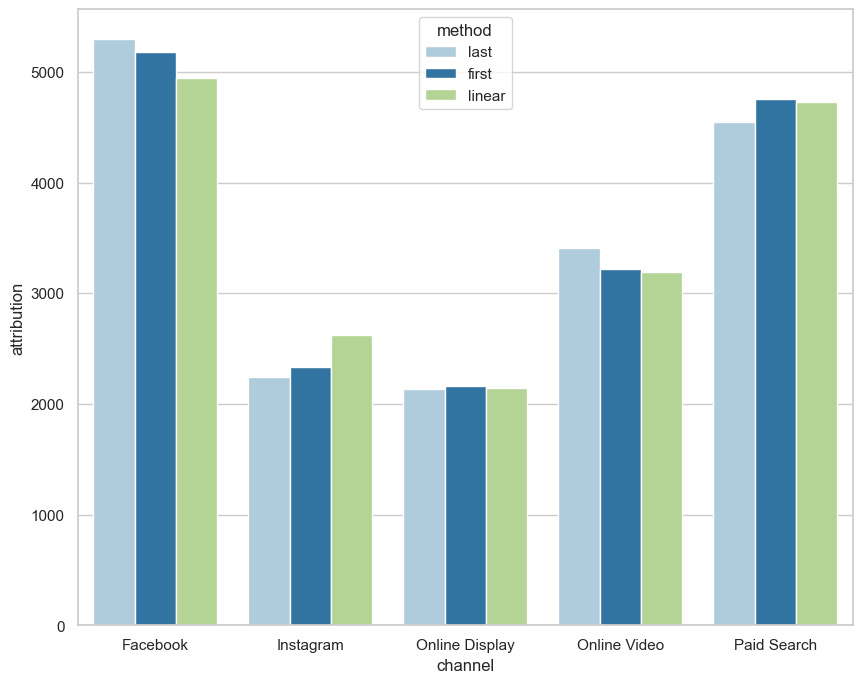

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_theme(style='whitegrid', palette='Paired')
sns.barplot(data=total_attrib, x='channel', y='attribution', hue='method')
plt.show()